# EE 452 – Power Electronics Design
## Homework 1
Due Date: Monday October 11th 2021, 11:59pm

**Instructions.** You must scan your completed homework assignment into a pdf file, and
upload your file to the Canvas Assignment HW#1 page by the due date/time above. All
pages must be gathered into a single file of moderate size, with the pages in the correct
order. Set your phone or scanner for basic black and white scanning. You should obtain a
file size of hundreds of kB, rather than tens of MB. I recommend using the ”Tiny Scanner”
app. Please note that the grader will not be obligated to grade your assignment if the file
is unreadable or very large.

In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator

**Problem 1.** Analysis and design of a buck-boost converter: A buck-boost converter is
illustrated in Fig. 1(a), and a practical implementation using a transistor and diode is
shown in Fig. 1(b).

<img src="img/EE532_HW01_Problem1.png" width="400">

**(a)** Find the dependence of the equilibrium output voltage $V$ and inductor current $I$ on
the duty ratio $D$, input voltage $V_g$, and load resistance $R$. You may assume that the
inductor current ripple and capacitor voltage ripple are small.

*Small-ripple approximation, $v \approx V$ and $i_L \approx I$

Switch closed (at position 1)

$\begin{eqnarray}
0 &=& V_g - v_L \\[0.25em]
v_L &=& V_g \\[0.25em]
\frac{di_L}{dt} &=& \frac{V_g}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

Switch open (at position 2)

$\begin{eqnarray}
0 &=& v_L - v \\[0.25em]
v_L &=& v \\[0.25em]
\frac{di_L}{dt} &=& \frac{v}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

Total Volt Seconds over 1 period for Inductor Voltage

$\begin{eqnarray}
&& \int_{o}^{T_S} v_L(t) dt \\[0.25em]
0 &=& D T_S \cdot V_g + (1-D)T_S \cdot V \\[0.25em]
0 &=& D V_g + (1-D) V \\[0.25em]
V &=& -V_g\frac{D}{(1-D)} = -V_g\frac{D}{D'} && [\text{Output Voltage }V] \\[0.25em]
\end{eqnarray}$

<hr>

Switch closed (at position 1)

$\begin{eqnarray}
i_C &=& -\frac{v}{R} &\approx&  -\frac{V}{R}\\[0.25em]
\end{eqnarray}$

Switch open (at position 2)

$\begin{eqnarray}
i_C &=& -i_L - \frac{v}{R} \\[0.25em]
i_C &\approx& -I - \frac{V}{R} \\[0.25em]
\end{eqnarray}$

Total Volt Seconds over 1 period for Capacitor Current $I$

$\begin{eqnarray}
&& \int_{o}^{T_S} i_C(t) dt \\[0.25em]
0 &=& D T_S \cdot (\frac{-V}{R}) + (1-D)T_S \cdot (-I - \frac{V}{R}) \\[0.25em]
0 &=& D (\frac{-V}{R}) + (1-D)(-I - \frac{V}{R}) \\[0.25em]
0 &=& D (\frac{-V}{R}) + D'(\frac{-V}{R}) - D'I \\[0.25em]
0 &=& (D+D')(\frac{-V}{R})- D'I \\[0.25em]
D'I &=& \frac{-V}{R} \\[0.25em]
I &=& \frac{-V}{D'R}  \\[0.25em]
I &=& V_g\frac{D}{D'D'R}  && [\text{Inductor Current }I] \\[0.25em]
\end{eqnarray}$

**(b)** Plot your results of part (a) over the range 0 ≤ D ≤ 1.

In [2]:
D = np.linspace(0,1,11)
Vg = 15
V = -12
R = 4
fs = 200e3
Ts = 1/fs
D_p = 1-D

/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


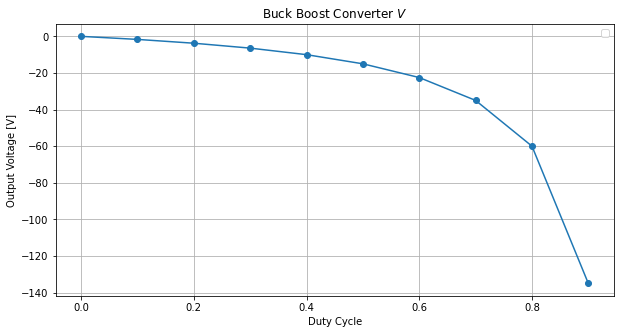

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Buck Boost Converter $V$')
ax.plot(D,-Vg*D/D_p,marker='o')
ax.set_ylabel('Output Voltage [V]')
ax.set_xlabel('Duty Cycle')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


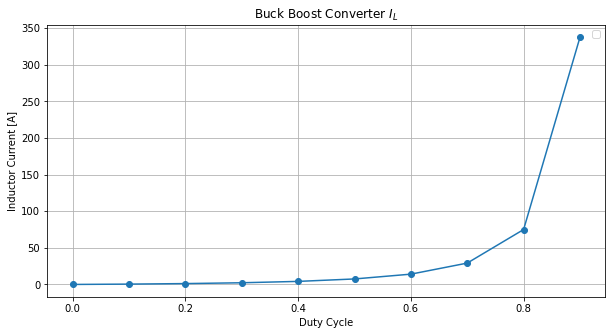

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Buck Boost Converter $I_L$')
ax.plot(D,Vg*D/D_p/D_p/R,marker='o')
ax.set_ylabel('Inductor Current [A]')
ax.set_xlabel('Duty Cycle')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

**(c)** DC design: For the specifications below:
- $V_g$ = 15 V, $V$ = −12 V, $R$ = 4 $\Omega$, $f_s$ = 200 kHz

**(i)** Find D and I

Solving for D:

$\begin{eqnarray}
V &=& -V_g\frac{D}{D'} \\[0.25em]
\frac{D}{D'} &=& \frac{-V}{V_g} \\[0.25em]
D &=& \frac{-V}{V_g}(1-D) \\[0.25em]
D - \frac{V}{V_g}D &=& \frac{-V}{V_g} \\[0.25em]
D(1 - \frac{V}{V_g}) &=& \frac{-V}{V_g} \\[0.25em]
D &=& \frac{-V/V_g}{(1 - V/V_g)} \\[0.25em]
D &=& 0.44
\end{eqnarray}$

In [5]:
D = -V/Vg/(1-V/Vg)
D_p = 1-D
print(f'Duty Cycle = {round(D,2)}')

Duty Cycle = 0.44


<hr>

Solving for I

$\begin{eqnarray}
I &=& V_g\frac{D}{D'D'R} \\[0.25em]
I &=& 5.4 \text{ Amps}
\end{eqnarray}$

In [6]:
I = Vg*D/D_p/D_p/R
print(f'Inductor Current = {round(I,2)}')

Inductor Current = 5.4


**(ii)** Calculate the value of $L$ that will make the peak inductor current ripple $\Delta i$ equal
to ten percent of the average inductor current $I$.

10% of $I$ = 0.54A 

$\begin{eqnarray}
2\Delta i &=& \frac{di_L}{dt}DT_S \\[0.25em]
\Delta i &=& \frac{V_g}{L}\frac{DT_S}{2} \\[0.25em]
0.54 &=& \frac{V_g}{L}\frac{DT_S}{2} \\[0.25em]
L &=& \frac{V_g}{0.54}\frac{DT_S}{2} \\[0.25em]
L &=& 30.9 \mu H
\end{eqnarray}$

In [7]:
L = (Vg/0.54)*D*Ts/2
print(f'L = {round(L,7)} uH')

L = 3.09e-05 uH


**(iii)** Choose $C$ such that the peak output voltage ripple $\Delta v$ is 0.1 V.

$\begin{eqnarray}
2\Delta v &=& \frac{dv_C}{dt}DT_S \\[0.25em]
\Delta v &=& \frac{i_C}{2C}DT_S \\[0.25em]
0.1 &=& \frac{-V}{2RC}DT_S \\[0.25em]
C &=& \frac{-V}{2R\cdot 0.1}DT_S \\[0.25em]
C &=& 33.3 \mu F
\end{eqnarray}$

In [8]:
C = D*Ts*-V/2/R/0.1
print(f'C = {round(C,7)} uH')

C = 3.33e-05 uH


**(d)** Sketch the transistor drain current waveform $i_T (t)$ for your design of part (c). Include
the effects of inductor current ripple, and label numerical values and axes. What is
the peak value of $i_T (t)$? Also sketch $i_T (t)$ for the case when $L$ is decreased such that
$\Delta i$ is 50% of $I$. What happens to the peak value of $i_T$ in this case?

Part c design:

In [9]:
Vg = 15
V = -12
R = 4
fs = 200e3
Ts = 1/fs
D = -V/Vg/(1-V/Vg)
D_p = 1-D

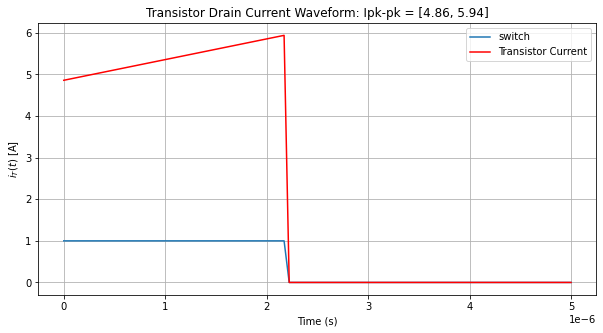

In [10]:
ripple_spec = 0.1
t = np.linspace(0,Ts,100)
enable = np.zeros(len(t))
switch = round(D*100)
enable[0:switch] = 1
enable[switch:] = 0
iL_avg = Vg*D/D_p/D_p/R
iL_pslope = Vg/L
ripple = iL_avg*ripple_spec
iT = np.zeros(len(t))
iT[0:switch] = np.linspace(iL_avg-ripple,iL_avg+ripple,switch)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Transistor Drain Current Waveform: Ipk-pk = [{round(min(iT[0:switch]),2)}, {round(max(iT),2)}]')
ax.plot(t,enable,label='switch')
ax.plot(t,iT,color='red',label='Transistor Current')
ax.set_ylabel('$i_T(t)$ [A]')
ax.set_xlabel('Time (s)')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

50% of $I$ = 2.7A 

In [11]:
L = (Vg/2.7)*D*Ts/2
print(f'L = {round(L,7)} uH')

L = 6.2e-06 uH


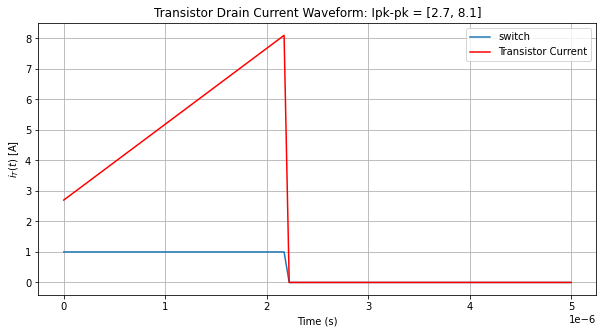

In [12]:
ripple_spec = 0.5
t = np.linspace(0,Ts,100)
enable = np.zeros(len(t))
switch = round(D*100)
enable[0:switch] = 1
enable[switch:] = 0
iL_avg = Vg*D/D_p/D_p/R
iL_pslope = Vg/L
ripple = iL_avg*ripple_spec
iT = np.zeros(len(t))
iT[0:switch] = np.linspace(iL_avg-ripple,iL_avg+ripple,switch)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Transistor Drain Current Waveform: Ipk-pk = [{round(min(iT[0:switch]),2)}, {round(max(iT),2)}]')
ax.plot(t,enable,label='switch')
ax.plot(t,iT,color='red',label='Transistor Current')
ax.set_ylabel('$i_T(t)$ [A]')
ax.set_xlabel('Time (s)')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

As L decreases, $i_T(t)$ increases. The positive slope is dependant on $\frac{V_g}{L}$.

**(e)** Sketch the diode current waveform $i_D (t)$ for the two cases of part d.

Part c design:

In [13]:
Vg = 15
V = -12
R = 4
fs = 200e3
Ts = 1/fs
D = -V/Vg/(1-V/Vg)
D_p = 1-D

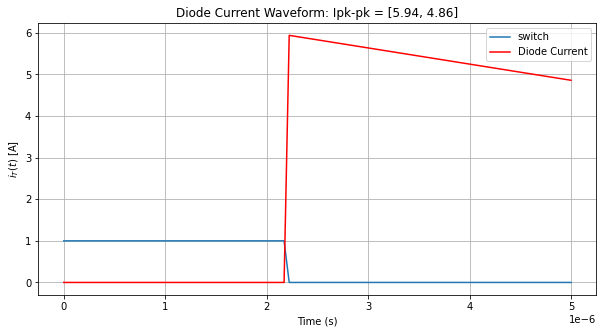

In [14]:
ripple_spec = 0.1
t = np.linspace(0,Ts,100)
enable = np.zeros(len(t))
switch = round(D*100)
enable[0:switch] = 1
enable[switch:] = 0
iL_avg = Vg*D/D_p/D_p/R
iL_nslope = V/L
ripple = iL_avg*ripple_spec
diode = np.zeros(len(t))
diode[switch:] = np.linspace(iL_avg+ripple,iL_avg-ripple,100-switch)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Diode Current Waveform: Ipk-pk = [{round(max(diode),2)}, {round(min(diode[switch:]),2)}]')
ax.plot(t,enable,label='switch')
ax.plot(t,diode,color='red',label='Diode Current')
ax.set_ylabel('$i_T(t)$ [A]')
ax.set_xlabel('Time (s)')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

50% of $I$ = 2.7A 

In [15]:
L = (Vg/2.7)*D*Ts/2
print(f'L = {round(L,7)} uH')

L = 6.2e-06 uH


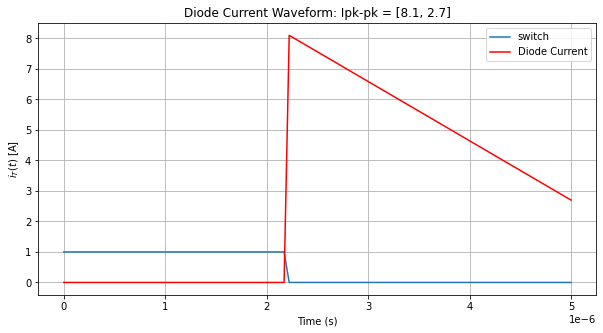

In [16]:
ripple_spec = 0.5
t = np.linspace(0,Ts,100)
enable = np.zeros(len(t))
switch = round(D*100)
enable[0:switch] = 1
enable[switch:] = 0
iL_avg = Vg*D/D_p/D_p/R
iL_nslope = V/L
ripple = iL_avg*ripple_spec
diode = np.zeros(len(t))
diode[switch:] = np.linspace(iL_avg+ripple,iL_avg-ripple,100-switch)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Diode Current Waveform: Ipk-pk = [{round(max(diode),2)}, {round(min(diode[switch:]),2)}]')
ax.plot(t,enable,label='switch')
ax.plot(t,diode,color='red',label='Diode Current')
ax.set_ylabel('$i_T(t)$ [A]')
ax.set_xlabel('Time (s)')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

**Problem 2.** The boost converter illustrated in Fig. 2 operates with the following conditions:
- $V_g$ = 3.3 V, $V$ = 5 V, $f_s$ = 500 kHz

All elements are ideal, and the converter operates in steady state with small inductor current
ripple and small capacitor voltage ripple.

<img src="img/EE532_HW01_Problem2.png" width="450">

In [17]:
Vg = 3.3
V = 5
fs = 500e3
Ts = 1/fs

**(a)** What is the duty cycle?

Switch closed (at position 1)

$\begin{eqnarray}
0 &=& V_g - v_L \\[0.25em]
v_L &=& V_g \\[0.25em]
\end{eqnarray}$

Switch open (at position 2)

$\begin{eqnarray}
0 &=& V_g - v_L - v \\[0.25em]
v_L &=& V_g - v \\[0.25em]
\end{eqnarray}$

Total Volt Seconds over 1 period for Inductor Voltage

$\begin{eqnarray}
&& \int_{o}^{T_S} v_L(t) dt \\[0.25em]
0 &=& D T_S \cdot V_g + (1-D)T_S \cdot (V_g-V) \\[0.25em]
0 &=& D V_g + D' (V_g-V) \\[0.25em]
0 &=& V_g(D + D') -V D' \\[0.25em]
0 &=& V_g -V D' \\[0.25em]
V &=& \frac{V_g}{D'} = \frac{V_g}{1-D} \\[0.25em]
\end{eqnarray}$

Solving for D:

$\begin{eqnarray}
1-D &=& \frac{V_g}{V} \\[0.25em]
D &=& 1-\frac{V_g}{V} \\[0.25em]
D &=& 0.34
\end{eqnarray}$

In [18]:
D = 1 - Vg/V
print(f'Duty Cycle = {round(D,2)}')

Duty Cycle = 0.34


**(b)** Sketch the waveform of the MOSFET drain-to-source voltage, $v_{DS}$.

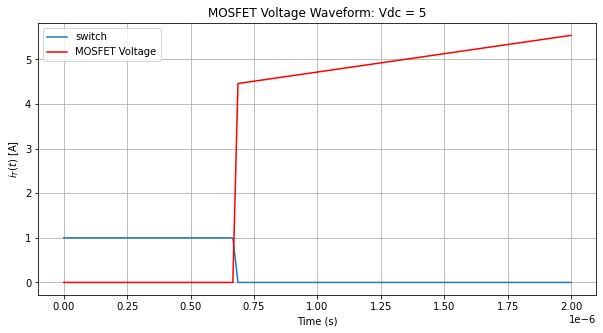

In [19]:
ripple_spec = 0.1
t = np.linspace(0,Ts,100)
enable = np.zeros(len(t))
switch = round(D*100)
enable[0:switch] = 1
enable[switch:] = 0
iL_pslope = Vg/L
ripple = iL_avg*ripple_spec
FET = np.zeros(len(t))
FET[switch:] = np.linspace(V-ripple,V+ripple,100-switch)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'MOSFET Voltage Waveform: Vdc = {V}')
ax.plot(t,enable,label='switch')
ax.plot(t,FET,color='red',label='MOSFET Voltage')
ax.set_ylabel('$i_T(t)$ [A]')
ax.set_xlabel('Time (s)')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

**(c)** Find the dc component of the voltage waveform in Part b.

$\begin{eqnarray}
\int_{o}^{T_S} v_{FET}(t) dt = (1-D)V = 3.3V\\[0.25em]
\end{eqnarray}$